C:\Users\hp\AppData\Local\Temp\ipykernel_6164\1304958035.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  weights[j,j]=np.exp(diff*diff.T/(-2.0*k**2))
C:\Users\hp\AppData\Local\Temp\ipykernel_6164\1304958035.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ypred[i]=xmat[i]*localWeight(xmat[i],xmat,ymat,k)


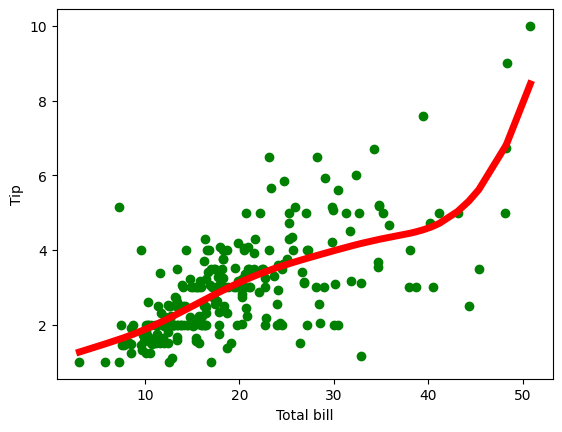

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def kernel(point,xmat,k):
    m,n=np.shape(xmat)
    weights=np.mat(np.eye(m))
    for j in range(m):
        diff=point-xmat[j]
        weights[j,j]=np.exp(diff*diff.T/(-2.0*k**2))
    return weights
def localWeight(point,xmat,ymat,k):
    wei=kernel(point,xmat,k)
    W=(xmat.T*(wei*xmat)).I*(xmat.T*(wei*ymat.T))
    return W
def localWeightRegression(xmat,ymat,k):
    m,n=np.shape(xmat)
    ypred=np.zeros(m)
    for i in range(m):
        ypred[i]=xmat[i]*localWeight(xmat[i],xmat,ymat,k)
    return ypred
def graphPlot(xmat,ypred):
    sortindex=xmat[:,1].argsort(0)
    xsort=xmat[sortindex][:,0]
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.scatter(bill,tip,color="green")
    ax.plot(xsort[:,1],ypred[sortindex],color="red",linewidth=5)
    plt.xlabel("Total bill")
    plt.ylabel("Tip")
    plt.show()
data=pd.read_csv('../data9.csv')
bill=np.array(data.total_bill)
tip=np.array(data.tip)
mbill=np.mat(bill)
mtip=np.mat(tip)
m=np.shape(mbill)[1]
one=np.mat(np.ones(m))
xmat=np.hstack((one.T,mbill.T))
ypred=localWeightRegression(xmat,mtip,5)
graphPlot(xmat,ypred)